# <center><h1 style="font-family: Times New Roman; color: black;">Multiple Linear Regression</h1></center> 

# Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

# Dataset Description:
The dataset consists of the following variables:
Age: Age in years

KM: Accumulated Kilometers on odometer

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power

Automatic: Automatic ( (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters

Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax: 

Price: Offer Price in EUROs

# Tasks:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of   3 different models.

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

5.Apply Lasso and Ridge methods on the model.

# Solutions:

# 1. Exploratory Data Analysis (EDA)

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [4]:
# Summary statistics
df.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [5]:
# Checking for missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

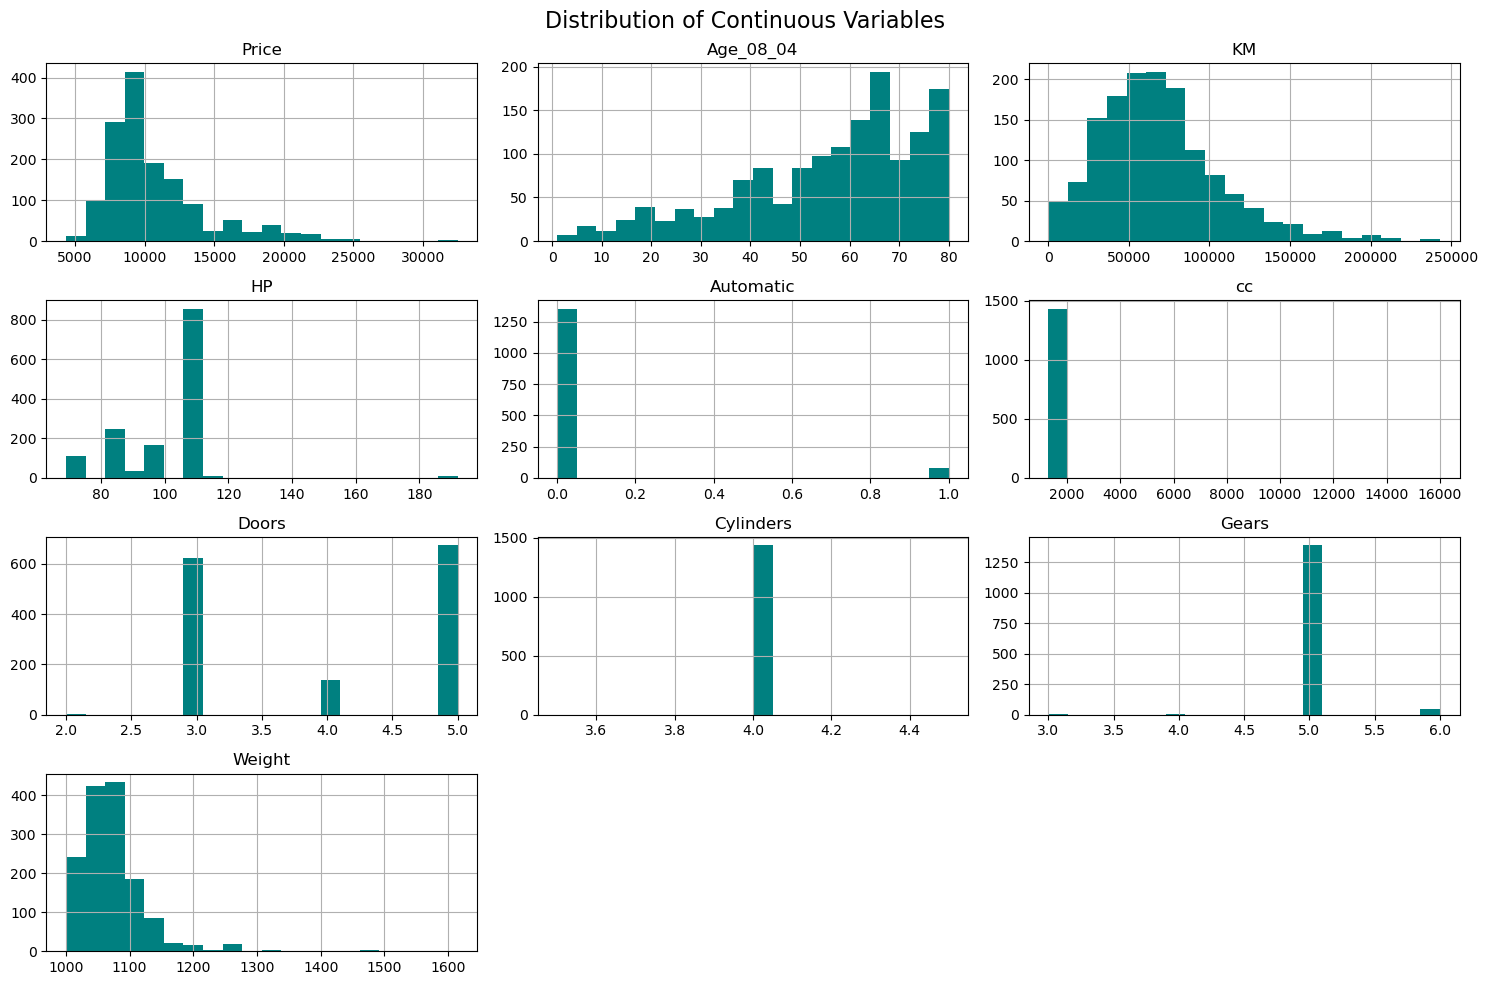

In [6]:
# Plotting histograms for continuous variables
df.hist(bins=20, figsize=(15, 10), color='teal')
plt.suptitle('Distribution of Continuous Variables', fontsize=16)
plt.tight_layout()
plt.show()

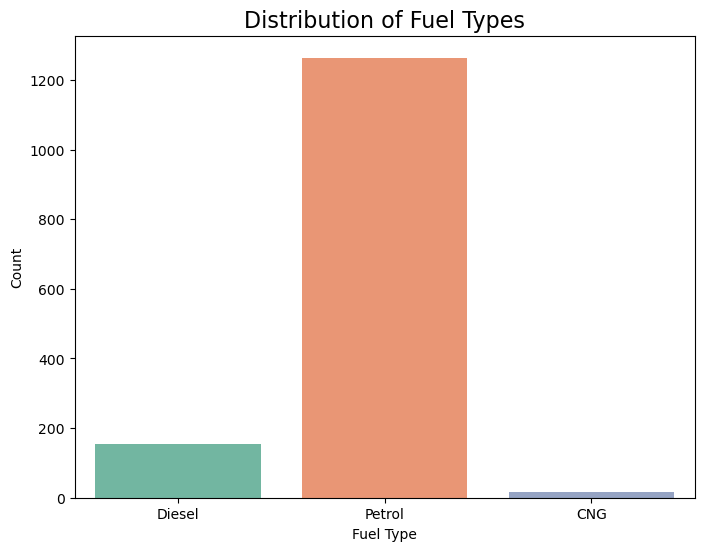

In [7]:
# Bar plot for categorical variable 'Fuel_Type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel_Type', data=df, palette='Set2')
plt.title('Distribution of Fuel Types', fontsize=16)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [8]:
# One-hot encoding the 'Fuel_Type' column
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Capping the 'cc' value at 2000 to handle the outlier
df['cc'] = df['cc'].apply(lambda x: 2000 if x > 2000 else x)

# Display the updated dataset
df.head()

Price  Age_08_04     KM  HP  Automatic    cc  Doors  Cylinders  Gears  \
0  13500         23  46986  90          0  2000      3          4      5   
1  13750         23  72937  90          0  2000      3          4      5   
2  13950         24  41711  90          0  2000      3          4      5   
3  14950         26  48000  90          0  2000      3          4      5   
4  13750         30  38500  90          0  2000      3          4      5   

   Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    1165                 1                 0  
1    1165                 1                 0  
2    1165                 1                 0  
3    1165                 1                 0  
4    1170                 1                 0

# 2. Split the Dataset into Training and Testing Sets

In [9]:
# Import Libraries
from sklearn.model_selection import train_test_split

In [10]:
# Define the target variable (Price) and feature variables
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split by checking the shapes
print(f"X_train shape: {X_train.shape}")  # Should be 80% of the original dataset
print(f"X_test shape: {X_test.shape}")    # Should be 20% of the original dataset
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1148, 11)
X_test shape: (288, 11)
y_train shape: (1148,)
y_test shape: (288,)


In [11]:
# Display a few rows from the training and testing sets to inspect the split
print("\nSample rows from X_train:")
print(X_train.head())

print("\nSample rows from X_test:")
print(X_test.head())

print("\nSample rows from y_train (target):")
print(y_train.head())

print("\nSample rows from y_test (target):")
print(y_test.head())


Sample rows from X_train:
      Age_08_04      KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
899          62   59295   86          0  1300      5          4      5   
881          68   61568  110          0  1600      4          4      5   
310          40   38653  110          0  1600      5          4      5   
1145         75  101855  110          0  1600      5          4      5   
31           22   35199   97          0  1400      3          4      5   

      Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
899     1035                 0                 1  
881     1035                 0                 1  
310     1080                 0                 1  
1145    1070                 0                 1  
31      1100                 0                 1  

Sample rows from X_test:
      Age_08_04      KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
594          50   22500   97          0  1400      3          4      5   
754          68   80426  110          0  1600   

# 3. Build Multiple Linear Regression Models

# Model 1: Baseline Multiple Linear Regression

In [26]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Load and preprocess the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')

# Handle missing values for numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_clean = df.copy()
df_clean[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Encode categorical variables using one-hot encoding
df_clean = pd.get_dummies(df_clean, drop_first=True)

# Define target (Price) and features
X = df_clean.drop(columns=['Price'])  # Features
y = df_clean['Price']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the baseline Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [28]:
# Print the results
print(f"Model 1: Baseline Linear Regression\n")
print(f"Coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

print(f"\nTraining Set Performance:")
print(f"Mean Squared Error: {train_mse}")
print(f"R²: {train_r2}")

print(f"\nTesting Set Performance:")
print(f"Mean Squared Error: {test_mse}")
print(f"R²: {test_r2}")

Model 1: Baseline Linear Regression

Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01 -1.10844667e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]
Intercept: -14255.38599356529

Training Set Performance:
Mean Squared Error: 1698694.1713486244
R²: 0.8702643169608926

Testing Set Performance:
Mean Squared Error: 2203043.8231437025
R²: 0.8348888040611082


# Model 2: Linear Regression with Standardized Features

In [29]:
# Import Libraries
from sklearn.preprocessing import StandardScaler

In [30]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model with standardized features
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_scaled = lr_scaled.predict(X_train_scaled)
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)

# Evaluate the model
train_mse_scaled = mean_squared_error(y_train, y_train_pred_scaled)
test_mse_scaled = mean_squared_error(y_test, y_test_pred_scaled)

train_r2_scaled = r2_score(y_train, y_train_pred_scaled)
test_r2_scaled = r2_score(y_test, y_test_pred_scaled)

In [31]:
# Print the results
print(f"\nModel 2: Linear Regression with Standardized Features\n")
print(f"Coefficients: {lr_scaled.coef_}")
print(f"Intercept: {lr_scaled.intercept_}")

print(f"\nTraining Set Performance (Standardized):")
print(f"Mean Squared Error: {train_mse_scaled}")
print(f"R²: {train_r2_scaled}")

print(f"\nTesting Set Performance (Standardized):")
print(f"Mean Squared Error: {test_mse_scaled}")
print(f"R²: {test_r2_scaled}")


Model 2: Linear Regression with Standardized Features

Coefficients: [-2.26729478e+03 -6.11654412e+02  2.08349858e+02  3.43971298e+01
 -1.41619166e+01 -5.74678039e+01 -1.70530257e-13  1.09340417e+02
  1.31681831e+03 -2.17221726e+01  4.58047731e+02]
Intercept: 10754.395470383277

Training Set Performance (Standardized):
Mean Squared Error: 1698694.1713486246
R²: 0.8702643169608926

Testing Set Performance (Standardized):
Mean Squared Error: 2203043.8231437034
R²: 0.8348888040611082


# Model 3: Linear Regression with Feature Subset

In [32]:
# Select a subset of features (excluding 'Doors' and 'Automatic')
X_train_subset = X_train.drop(columns=['Doors', 'Automatic'])
X_test_subset = X_test.drop(columns=['Doors', 'Automatic'])

# Train the Linear Regression model on the subset of features
lr_subset = LinearRegression()
lr_subset.fit(X_train_subset, y_train)

# Make predictions
y_train_pred_subset = lr_subset.predict(X_train_subset)
y_test_pred_subset = lr_subset.predict(X_test_subset)

# Evaluate the model
train_mse_subset = mean_squared_error(y_train, y_train_pred_subset)
test_mse_subset = mean_squared_error(y_test, y_test_pred_subset)

train_r2_subset = r2_score(y_train, y_train_pred_subset)
test_r2_subset = r2_score(y_test, y_test_pred_subset)

In [33]:
# Print the results
print(f"\nModel 3: Linear Regression with Feature Subset\n")
print(f"Coefficients: {lr_subset.coef_}")
print(f"Intercept: {lr_subset.intercept_}")

print(f"\nTraining Set Performance (Subset of Features):")
print(f"Mean Squared Error: {train_mse_subset}")
print(f"R²: {train_r2_subset}")

print(f"\nTesting Set Performance (Subset of Features):")
print(f"Mean Squared Error: {test_mse_subset}")
print(f"R²: {test_r2_subset}")


Model 3: Linear Regression with Feature Subset

Coefficients: [-1.20493571e+02 -1.65066534e-02  1.40342506e+01 -2.37833291e-02
  7.67386155e-13  5.87632514e+02  2.54980008e+01 -5.58081839e+01
  1.34447195e+03]
Intercept: -14244.70822491335

Training Set Performance (Subset of Features):
Mean Squared Error: 1702920.706187133
R²: 0.8699415205485594

Testing Set Performance (Subset of Features):
Mean Squared Error: 2204088.507588393
R²: 0.8348105082522689


# 4. Performance of the model using appropriate evaluation

In [34]:
# Model 1 Results
print("Model 1: Baseline Linear Regression")
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")

# Model 2 Results
print("\nModel 2: Linear Regression with Standardized Features")
print(f"Training MSE (Standardized): {train_mse_scaled}")
print(f"Testing MSE (Standardized): {test_mse_scaled}")
print(f"Training R² (Standardized): {train_r2_scaled}")
print(f"Testing R² (Standardized): {test_r2_scaled}")

# Model 3 Results
print("\nModel 3: Linear Regression with Feature Subset")
print(f"Training MSE (Subset): {train_mse_subset}")
print(f"Testing MSE (Subset): {test_mse_subset}")
print(f"Training R² (Subset): {train_r2_subset}")
print(f"Testing R² (Subset): {test_r2_subset}")

Model 1: Baseline Linear Regression
Training MSE: 1698694.1713486244
Testing MSE: 2203043.8231437025
Training R²: 0.8702643169608926
Testing R²: 0.8348888040611082

Model 2: Linear Regression with Standardized Features
Training MSE (Standardized): 1698694.1713486246
Testing MSE (Standardized): 2203043.8231437034
Training R² (Standardized): 0.8702643169608926
Testing R² (Standardized): 0.8348888040611082

Model 3: Linear Regression with Feature Subset
Training MSE (Subset): 1702920.706187133
Testing MSE (Subset): 2204088.507588393
Training R² (Subset): 0.8699415205485594
Testing R² (Subset): 0.8348105082522689


# 5. Lasso and Ridge Regression Implementation

In [35]:
# Import libraries for Lasso and Ridge
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Lasso Regression with alpha (regularization strength)
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Predict using Lasso
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso performance
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

In [37]:
# Display Lasso results
print(f"\nLasso Regression\n")
print(f"Training Set Performance:")
print(f"Mean Squared Error: {train_mse_lasso}")
print(f"R²: {train_r2_lasso}")

print(f"\nTesting Set Performance:")
print(f"Mean Squared Error: {test_mse_lasso}")
print(f"R²: {test_r2_lasso}")


Lasso Regression

Training Set Performance:
Mean Squared Error: 1698782.9912300946
R²: 0.8702575334514273

Testing Set Performance:
Mean Squared Error: 2195387.2460865397
R²: 0.8354626403967389


In [38]:
# Ridge Regression with alpha (regularization strength)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict using Ridge
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Evaluate Ridge performance
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

In [39]:
# Display Ridge results
print(f"\nRidge Regression\n")
print(f"Training Set Performance:")
print(f"Mean Squared Error: {train_mse_ridge}")
print(f"R²: {train_r2_ridge}")

print(f"\nTesting Set Performance:")
print(f"Mean Squared Error: {test_mse_ridge}")
print(f"R²: {test_r2_ridge}")


Ridge Regression

Training Set Performance:
Mean Squared Error: 1698777.657917775
R²: 0.8702579407766118

Testing Set Performance:
Mean Squared Error: 2199746.3702333285
R²: 0.8351359377712344


<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>